# Arms Exports Analysis
### By: Keith D. Smith
### February 19, 2023

## Acquire Data
### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

### Import Data

In [3]:
df = pd.read_csv('insurance.csv')

### Prepare Data

In [4]:
df.__dir__()

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.shape

(1338, 7)

In [11]:
df[df.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges


In [12]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis

In [14]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [15]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [16]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
#Separate continuous and categorical variables
def cat_con_sep(df):
    cat, con = [], []
    for i in df.columns:
        if df[i].dtype == 'object':
            cat.append(i)
        else:
            con.append(i)
    return cat, con

In [19]:
cat, con = cat_con_sep(df)

In [20]:
cat

['sex', 'smoker', 'region']

In [21]:
con

['age', 'bmi', 'children', 'charges']

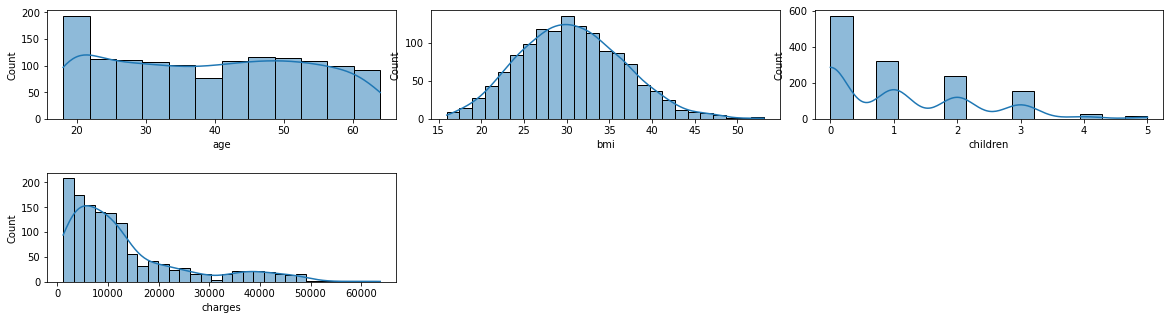

In [22]:
plt.figure(figsize = (20, 20))
plt.subplots_adjust(top = 0.99, bottom = 0.01, hspace = 0.5, wspace = 0.1)
x = 1

for i in con:
    plt.subplot(9, 3, x)
    x = x+1
    sns.histplot(data = df, x = i, kde = True)
plt.show()

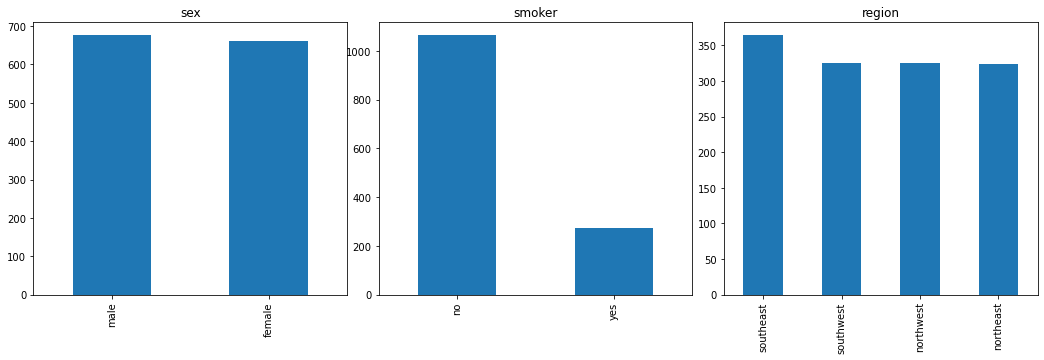

In [28]:
plt.figure(figsize = (18, 18))
x = 1
plt.subplots_adjust(top = 0.85, bottom=0.01, hspace=0.5, wspace=0.1)

for i in cat:
    plt.subplot(3, 3, x)
    x = x+1
    df[i].value_counts().plot(kind='bar')
    plt.title(i)
plt.show()

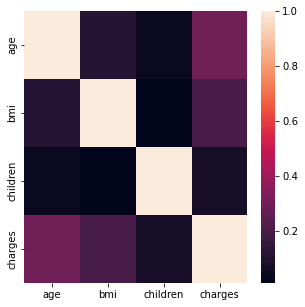

In [29]:
plt.figure(figsize = (5, 5))
sns.heatmap(df.corr())
plt.show()

In [30]:
import plotly.express as px
fig = px.scatter_matrix(df)
fig.show()

In [31]:
df.skew()

C:\Users\12523\AppData\Local\Temp/ipykernel_18828/1665899112.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

<AxesSubplot:xlabel='sex', ylabel='charges'>

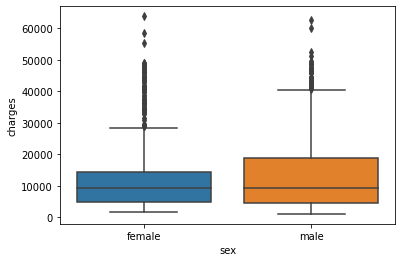

In [32]:
sns.boxplot(data=df, x="sex", y="charges")

<AxesSubplot:xlabel='region', ylabel='charges'>

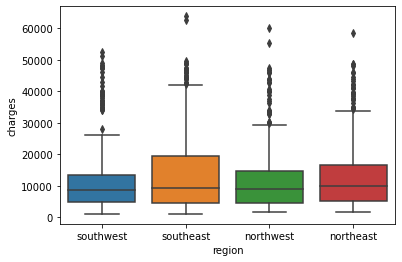

In [33]:
sns.boxplot(data=df, x="region", y="charges")

<AxesSubplot:xlabel='smoker', ylabel='charges'>

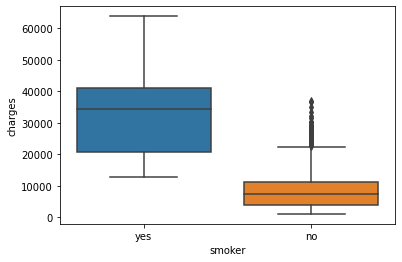

In [34]:
sns.boxplot(data=df, x="smoker", y="charges")

### Encoding & Partition Data into Training and Test Data

In [35]:
y=df['charges']
X=df.loc[:, df.columns != 'charges']
X=pd.get_dummies(X, columns=["sex", "smoker", "region"], drop_first=True)
print(y.head())
print(X.head())

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64
   age     bmi  children  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0         0           1                 0   
1   18  33.770         1         1           0                 0   
2   28  33.000         3         1           0                 0   
3   33  22.705         0         1           0                 1   
4   32  28.880         0         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   sex_male          1338 non-null   uint8  
 4   smoker_yes        1338 non-null   uint8  
 5   region_northwest  1338 non-null   uint8  
 6   region_southeast  1338 non-null   uint8  
 7   region_southwest  1338 non-null   uint8  
dtypes: float64(1), int64(2), uint8(5)
memory usage: 38.0 KB


### Feature Importance

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

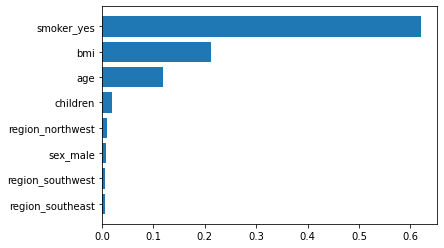

In [38]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

## Statistical Significance of Predictors

In [39]:
import statsmodels.api as sm
mod = sm.OLS(y, X)
fit = mod.fit()
fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.874     
Dependent Variable:     charges          AIC:                         27251.0265
Date:                   2023-02-19 17:47 BIC:                         27292.6180
No. Observations:       1338             Log-Likelihood:              -13618.   
Df Model:               8                F-statistic:                 1158.     
Df Residuals:           1330             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.874            Scale:                       4.0757e+07
---------------------------------------------------------------------------------
                      Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------
age                   203.0019   11.6191  17.4714  0.0000    180.2082    225.7957
bmi                    69.2858   18.8147   3.6825  0.0002     32.3761    106.1955
children              289.0531  144.2126   2.0044  0.0452      6.1440    571.9621
sex_male             -665.6124  347.5284  -1.9153  0.0557  -1347.3759     16.1511
smoker_yes          23374.5387  433.1372  53.9657  0.0000  22524.8321  24224.2453
region_northwest    -1736.0707  486.8830  -3.5657  0.0004  -2691.2131   -780.9283
region_southeast    -1281.8646  503.6635  -2.5451  0.0110  -2269.9261   -293.8030
region_southwest    -1950.0825  495.8748  -3.9326  0.0001  -2922.8645   -977.3006
--------------------------------------------------------------------------------
Omnibus:                   275.143           Durbin-Watson:              2.062  
Prob(Omnibus):             0.000             Jarque-Bera (JB):           642.991
Skew:                      1.123             Prob(JB):                   0.000  
Kurtosis:                  5.548             Condition No.:              206    
================================================================================

"""

In [40]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = X.drop('sex_male', axis=1)
print(X.head())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

   age     bmi  children  smoker_yes  region_northwest  region_southeast  \
0   19  27.900         0           1                 0                 0   
1   18  33.770         1           0                 0                 1   
2   28  33.000         3           0                 0                 1   
3   33  22.705         0           0                 1                 0   
4   32  28.880         0           0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0  
(1003, 7)
(1003,)
(335, 7)
(335,)


### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.7343256521195087
MAE:  4195.713973043716
MSE:  37344178.34223743


### Decision Tree Regression

In [42]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train,y_train)
y_pred = dt_regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Suppport Vector Regression Accuracy: ', dt_regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.725636939111646
R2 square: 0.725636939111646
MAE:  2960.9363988179102
MSE:  38565496.2854967


### Random Forrest Regression

In [43]:
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)
y_pred = rf_regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Suppport Vector Regression Accuracy: ', rf_regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.8422351164636398
R2 square: 0.8422351164636398
MAE:  2558.8632285111753
MSE:  22176021.109777525


### Support Vector Regression

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   smoker_yes        1338 non-null   uint8  
 4   region_northwest  1338 non-null   uint8  
 5   region_southeast  1338 non-null   uint8  
 6   region_southwest  1338 non-null   uint8  
dtypes: float64(1), int64(2), uint8(4)
memory usage: 36.7 KB


In [45]:
from sklearn.compose import make_column_selector as selector

y=df['charges']
X=df.loc[:, df.columns != 'charges']

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop="first")
numerical_preprocessor = StandardScaler()

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [46]:
from sklearn.svm import SVR
regressor = make_pipeline(preprocessor, SVR())
regressor.fit(X_train,y_train)
y_pred_svm=regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred_svm)
mse=metrics.mean_squared_error(y_test, y_pred_svm)
print('Suppport Vector Regression Accuracy: ', regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred_svm))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  -0.09463218396458672
R2 square: -0.09463218396458672
MAE:  8099.677532894166
MSE:  153865587.03633162
